# Watch a temperature : scan temperature *v* time

From *2021-03 APS Python Training for Bluesky Data Acquisition*.

**Objective**

Measure the temperature for a short period and compute basics measures of the collected readings.

## Start the `instrument` package

In [1]:
from instrument.collection import *

I Wed-19:54:50 - ############################################################ startup
I Wed-19:54:50 - logging started
I Wed-19:54:50 - logging level = 10
I Wed-19:54:50 - /home/beams1/JEMIAN/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/collection.py
I Wed-19:54:50 - /home/beams1/JEMIAN/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/mpl/notebook.py
Activating auto-logging. Current session state plus future input saved.
Filename       : /home/beams1/JEMIAN/Documents/projects/BCDA-APS/bluesky_instrument_training/.logs/ipython_console.log
Mode           : rotate
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
I Wed-19:54:51 - #### Bluesky Framework ####
I Wed-19:54:51 - /home/beams1/JEMIAN/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/framework/check_python.py
I Wed-19:54:51 - /home/beams1/JEMIAN/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/framework/check_bluesk

## Describe

Note the initial settings of the `temperature` (controller).  It's actually an EPICS *swait* record that simulates a temperature sensor and controller.  It has a setpoint, a readback, and a few other support attributes as shown.  A Random noise level is part of the simulation.  We'll compute that noise level from the standard deviation of the measurements.

In [2]:
listdevice(temperature)

============================= =================================== ==========================
name                          value                               timestamp                 
============================= =================================== ==========================
temperature_setpoint          25.0                                2021-02-24 19:55:07.276935
temperature_readback          25.0                                2021-02-24 19:55:07.279293
temperature_done              True                                2021-02-24 19:55:07.280157
temperature_calculation       A+max(-D,min(D,(B-A)))+C*(RNDM-0.5) 2021-02-24 19:55:07.280825
temperature_description       temperature                         2021-02-24 19:55:07.275559
temperature_max_change        2.0                                 2021-02-24 19:55:07.280665
temperature_noise             1.0                                 2021-02-24 19:55:07.279293
temperature_previous_value_pv gp:userCalc8.VAL                    2021

## Count
Use the bluesky RunEngine, `RE`, and a standard plan, `bp.count()`, to count the temperature.

In [3]:
RE(bp.count([temperature]))



Transient Scan ID: 42806     Time: 2021-02-24 19:55:07
Persistent Unique Scan ID: '188b6b48-4fa5-4a81-af86-3feb06222bbd'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+
|   seq_num |       time | temperature_readback |
+-----------+------------+----------------------+
|         1 | 19:55:07.7 |             25.00000 |
+-----------+------------+----------------------+
generator count ['188b6b48'] (scan num: 42806)


('188b6b48-4fa5-4a81-af86-3feb06222bbd',)

Take ten readings by adding the `num=10` keyword argument (a.k.a. *kwarg*).



Transient Scan ID: 42807     Time: 2021-02-24 19:55:07
Persistent Unique Scan ID: 'bd1b5a04-eaf2-44f1-aafb-9ec9a9eaa00f'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+
|   seq_num |       time | temperature_readback |
+-----------+------------+----------------------+
|         1 | 19:55:08.8 |             25.00000 |
|         2 | 19:55:08.9 |             25.44661 |
|         3 | 19:55:09.0 |             25.44661 |
|         4 | 19:55:09.0 |             25.44661 |
|         5 | 19:55:09.0 |             25.44661 |
|         6 | 19:55:09.1 |             25.44661 |
|         7 | 19:55:09.1 |             25.44661 |
|         8 | 19:55:09.2 |             25.44661 |
|         9 | 19:55:09.2 |             25.44661 |
|        10 | 19:55:09.2 |             25.44661 |
+-----------+------------+----------------------+
generator count ['bd1b5a04'] (scan num: 42807)


('bd1b5a04-eaf2-44f1-aafb-9ec9a9eaa00f',)

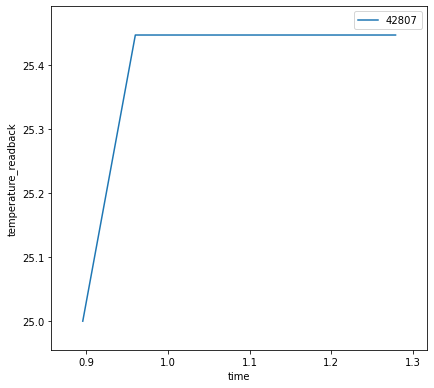

In [4]:
RE(bp.count([temperature], num=10))

Do all the readings look the same?  Perhaps there are only two different values (first one, then the other)?  That's because our measurements were only *reading* the temperature without waiting for it to update.  (If there are two different values, we caught the moment when EPICS updated the calculation.)  The table above showed `temperature_scanning_rate 5` which means EPICS is only updating every 2 seconds.

In [5]:
temperature.scanning_rate.get(as_string=True)

'2 second'

## Adjust the measurement interval
We need to slow down the measurement to this interval by adding the `delay=2` kwarg, sampling every 2 seconds.



Transient Scan ID: 42808     Time: 2021-02-24 19:55:10
Persistent Unique Scan ID: '54623bd2-8a5e-4cb4-9e3e-2787fbd2a808'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+
|   seq_num |       time | temperature_readback |
+-----------+------------+----------------------+
|         1 | 19:55:10.4 |             25.44661 |
|         2 | 19:55:12.3 |             24.54201 |
|         3 | 19:55:14.3 |             25.00504 |
|         4 | 19:55:16.3 |             24.91894 |
|         5 | 19:55:18.3 |             25.42848 |
|         6 | 19:55:20.3 |             25.22824 |
|         7 | 19:55:22.3 |             24.91025 |
|         8 | 19:55:24.3 |             25.48358 |
|         9 | 19:55:26.3 |             25.12812 |
|        10 | 19:55:28.3 |             24.99551 |
+-----------+------------+----------------------+
generator count ['54623bd2'] (scan num: 42808)


('54623bd2-8a5e-4cb4-9e3e-2787fbd2a808',)

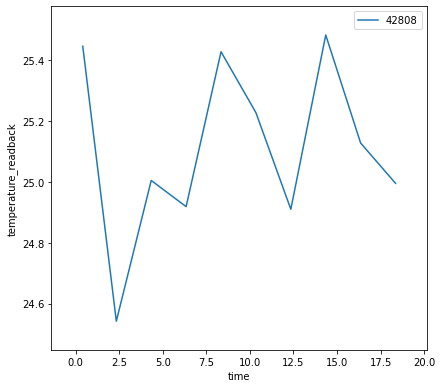

In [6]:
RE(bp.count([temperature], num=10, delay=2))

Let's reduce the update interval that EPICS uses, to the shortest interval EPICS provides, so our measurements do not take so long.

In [7]:
# print the list of possible values
print(temperature.scanning_rate.enum_strs)

# set the shortest interval, by name
temperature.scanning_rate.put(".1 second")
temperature.scanning_rate.get(as_string=True)

('Passive', 'Event', 'I/O Intr', '10 second', '5 second', '2 second', '1 second', '.5 second', '.2 second', '.1 second')


'2 second'

## Collect our measurements
Repeat the measurement, this time with more observations.

Also, we'll add a metadata key:value pair so that later we can find this data more easily in the database.  Most plans take a `md={}` kwarg where the value is a Python dictionary with the key:value pair(s) to add to the run's metadata.



Transient Scan ID: 42809     Time: 2021-02-24 19:55:30
Persistent Unique Scan ID: 'dff821e7-98a4-4253-88f5-107ec4c9c2aa'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+
|   seq_num |       time | temperature_readback |
+-----------+------------+----------------------+
|         1 | 19:55:31.3 |             24.90781 |
|         2 | 19:55:31.4 |             24.85961 |
|         3 | 19:55:31.5 |             24.96516 |
|         4 | 19:55:31.6 |             25.32684 |
|         5 | 19:55:31.7 |             25.21974 |
|         6 | 19:55:31.8 |             25.03323 |
|         7 | 19:55:31.9 |             25.11619 |
|         8 | 19:55:32.0 |             25.29699 |
|         9 | 19:55:32.1 |             25.46553 |
|        10 | 19:55:32.2 |             24.82711 |
|        11 | 19:55:32.3 |             25.14079 |
|        12 | 19:55:32.4 |             25.00445 |
|        13 | 19:55:32.5 |             24.99940 |
|        14 | 19:55:32.6 |      

('dff821e7-98a4-4253-88f5-107ec4c9c2aa',)

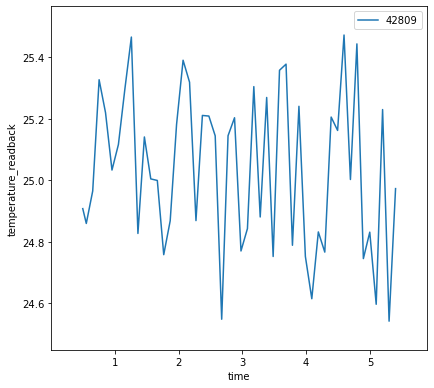

In [8]:
RE(bp.count([temperature], num=50, delay=0.1, md={"motive": "tscan"}))

## Get the data (from the database)
Let's get the measured data from the database now.  It's the most recent bluesky run, so an index of `-1` will identify it.

In [9]:
dataset = db.v2[-1].primary.read()

Let's get the values as a 1-D numpy array.

In [10]:
T = dataset["temperature_readback"].values

## Compute the statistics
Use the methods of numpy arrays to compute maximum, mean, standard deviation, and minimum.  Looks nicer in a table.

In [11]:
table = pyRestTable.Table()
table.addLabel("measure")
table.addLabel("value")
table.addRow(("max", T.max()))
table.addRow(("mean", T.mean()))
table.addRow(("dev", T.std()))
table.addRow(("min", T.min()))
table.addRow(("#", len(T)))
print(table)

======= ==================
measure value             
======= ==================
max     25.472167544060426
mean    25.03523949034867 
dev     0.2544483983769354
min     24.54193179217212 
#       50                
======= ==================



Let's replot that data for comparison.

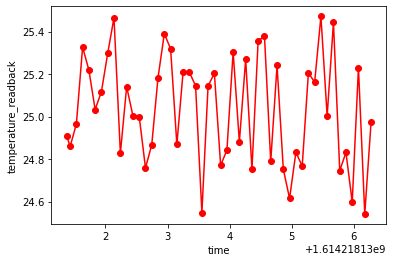

In [12]:
dataset["temperature_readback"].plot(marker="o", color="red")